## Business Problem/Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### This Project tries to predict whether the loan will be approved or not for an individual the basis of features such as cibil score, education level, annual income etc.
 

> ### Outline:


1. [Data Collection](#1)
2. [Feature Engineering](#2)
3. [Data Cleaning](#3)
4. [Exploratory Data Analysis](#4)
5. [Data Preprocessing](#5)
6. [ML Modelling with Hyperparameter Tuning](#6)
7. [Model Evalution](#7)


## Dataset Features.
----
<table>
    <tr><td> loan_id       </td><td>  Unique loan ID</td></tr>
    <tr><td> no_of_dependents</td><td> Number of dependents of the applicant</td></tr>
    <tr><td> education</td><td>Education level of the applicant</td></tr>
    <tr><td> self_employed</td><td>If the applicant is self-employed or not</td></tr>
    <tr><td> income_annum</td><td>Annual income of the applicant</td></tr>
    <tr><td> loan_amount</td><td>Loan amount requested by the applicant</td></tr>
<tr><td> loan_tenure</td><td>Tenure of the loan requested by the applicant (in Years)</td></tr>
    <tr><td> cibil_score</td><td>CIBIL score of the applicant</td></tr>
    <tr><td> residential_asset_value</td><td>Value of the residential asset of the applicant</td></tr>
    <tr><td> commercial_asset_value</td><td>Value of the commercial asset of the applicant</td></tr>
    <tr><td> luxury_asset_value</td><td>Value of the luxury asset of the applicant</td></tr>
    <tr><td> bank_assets_value</td><td>Value of the bank asset of the applicant</td></tr>
<tr><td> loan_status</td><td>Status of the loan (Approved/Rejected)</td></table></tr>

### Importing Packages 

In [58]:
import pandas as pd
import numpy as np

<a id="1"></a><br>
# 1. Data Collection


In [59]:
df = pd.read_csv("loan_approval_dataset.csv")

> **sample of dataset in large data set**

In [60]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3461,3462,1,Graduate,Yes,4200000,11300000,4,704,4700000,2800000,14900000,4000000,Approved
878,879,4,Not Graduate,No,4400000,17000000,18,302,1000000,2100000,14000000,5700000,Rejected
3665,3666,5,Graduate,Yes,6400000,20000000,12,594,100000,2100000,16500000,5500000,Approved
1294,1295,4,Not Graduate,No,3900000,10000000,10,530,10900000,200000,12300000,1900000,Rejected
2266,2267,5,Not Graduate,Yes,9200000,36300000,2,655,3000000,1200000,32200000,8700000,Approved


<a id="2"></a><br>
# 2. Feature Engineering  

Drop unrelavant colums

In [61]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [62]:
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4269, 12)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [64]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [65]:
# # Movable Assets
# df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

# #Immovable Assets
# df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [66]:
# # Drop columns
# df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

Finding the unique values

In [67]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')
    
for col in df.columns:
    #valuecounts(col)
    uniquevals(col)
    print("-"*75)

Unique Values in  no_of_dependents is : [2 0 3 5 4 1]
---------------------------------------------------------------------------
Unique Values in  education is : [' Graduate' ' Not Graduate']
---------------------------------------------------------------------------
Unique Values in  self_employed is : [' No' ' Yes']
---------------------------------------------------------------------------
Unique Values in  income_annum is : [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000

Differenciating categorical and categorical features

In [68]:
# select all categorical data type and stored in one dataframe and select all other categorical and stored in one data frame
cat_var = df.select_dtypes(include=['object']).columns
num_var = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

cat_var ,num_var

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
        ' luxury_assets_value', ' bank_asset_value'],
       dtype='object'))

<a id="3"></a><br>
# 3. Data Cleaning

In [69]:
# import missingno as msno
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")

In [70]:
# msno.bar(df)

Handling null values

In [71]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

As we can see in the output.

- There are `4269 ` entries
- There are total 12 features (0 to 11)
- There are three types of datatype `dtypes:  int64(9), object(3)`
- It's Memory usage that is, `memory usage: 400.3+ KB`
- Also, We can check how many missing values available in the `Non-Null Count` column

<a id="4"></a><br>
# 4. Exploratory Data Analysis


In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

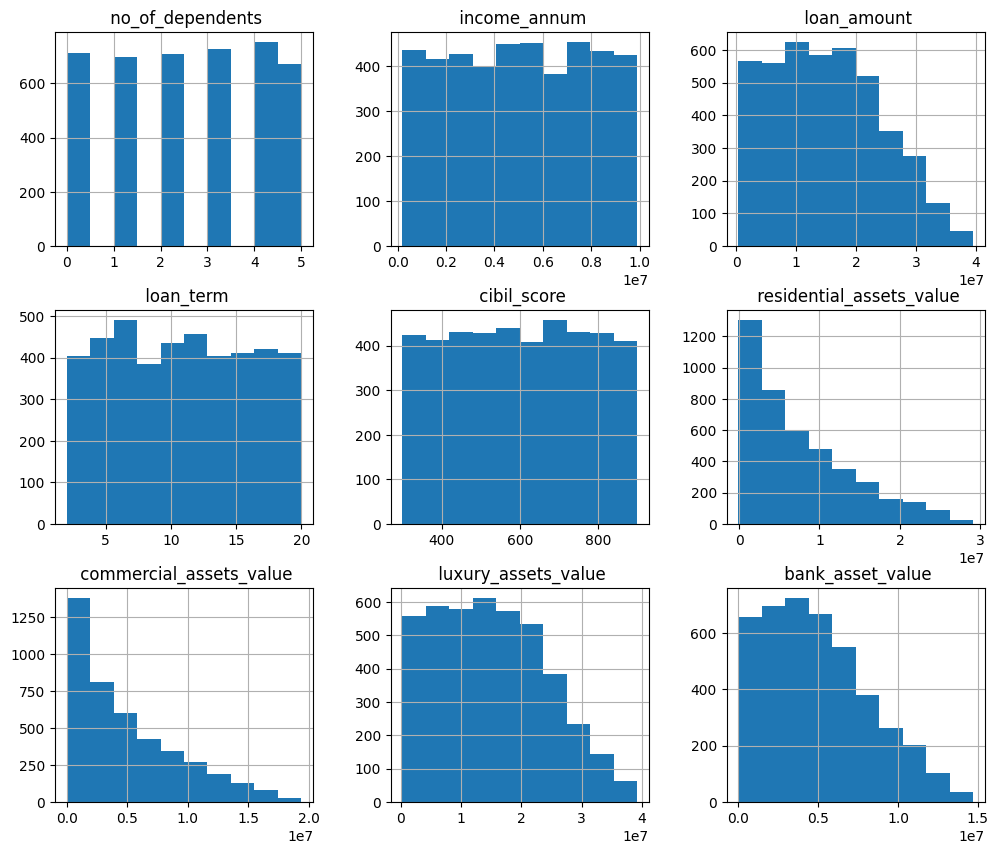

In [73]:
plot = df.hist(figsize=(12,10))

### Loan Status Distribution

Text(0.5, 1.0, 'loan_status')

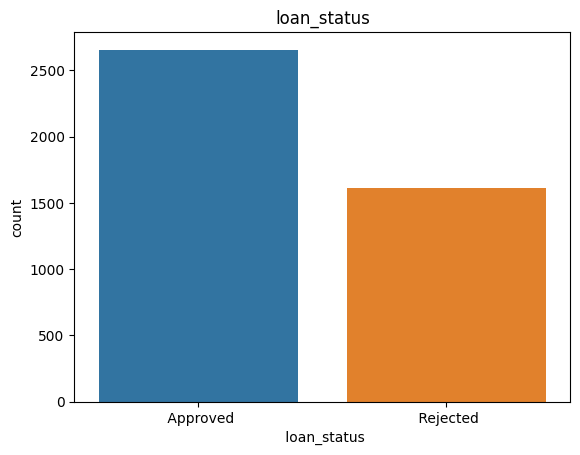

In [74]:
sns.countplot(x = ' loan_status', data = df).set_title('loan_status')

> Dataset is clearly unbalanced (Approved > Rejected)

### Number Of Dependents Distribution 

Text(0.5, 1.0, 'Number of Dependents')

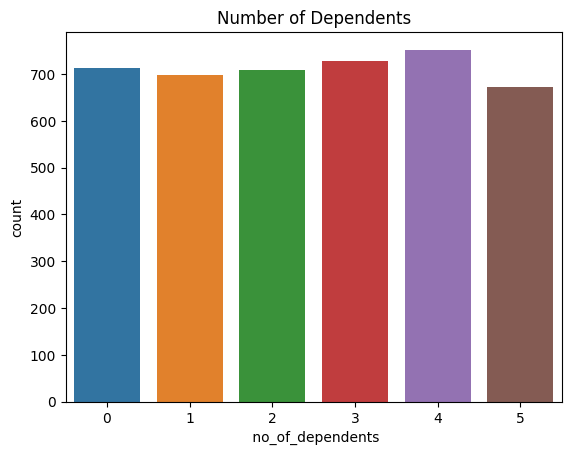

In [75]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

> The graph illustrates the number of dependent individuals associated with loan applicants, revealing a stark contrast in living arrangements. There is not much difference in the number of dependents,Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.**

### Number of Dependants Vs Loan Status

<AxesSubplot: xlabel=' no_of_dependents', ylabel='count'>

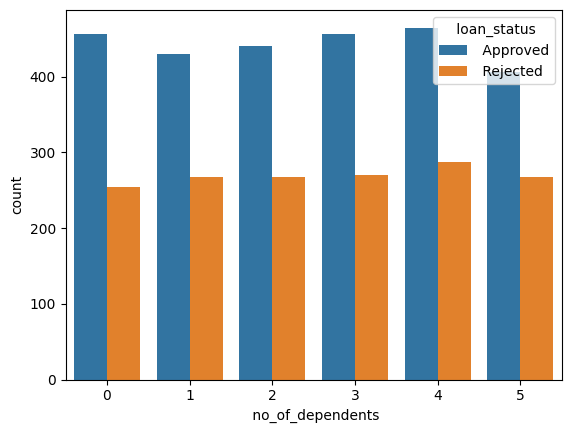

In [76]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

> The graph tells us that when someone has more family members they take care of, their chances of loan rejection go up. But what's interesting is that the number of people who get loans approved doesn't change much, even if they have more family members. This means my guess that loans might be approved less often for people with more family members isn't really right, based on this graph. It shows that sometimes what we think might not match what actually happens.

### Education and Self Employed

Text(0.5, 1.0, 'Self Employed')

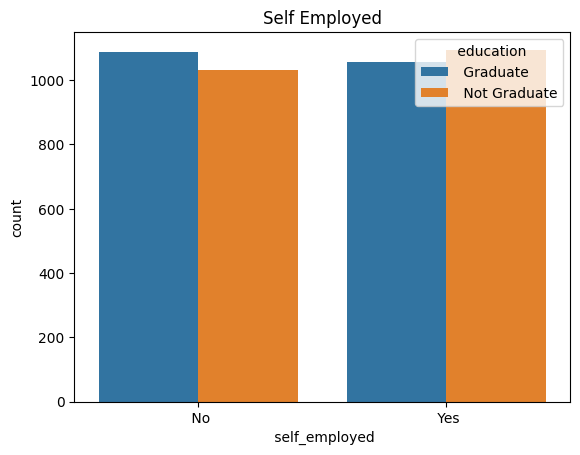

In [77]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

> The graph depicting the relationship between the employment status of applicants and their education levels highlights important trends for loan approval considerations. It reveals that a majority of non-graduate applicants are self-employed, while most graduate applicants are not self-employed. This indicates that graduates are more likely to be employed in salaried positions, whereas non-graduates tend to be self-employed.
 `This distinction has implications for loan approval decisions. Graduates' propensity for stable salaried employment suggests a more predictable income source, potentially enhancing their ability to repay loans. Conversely, self-employed non-graduates might have more fluctuating incomes, posing challenges for consistent loan repayment.`
 However, it's important to note that self-employed individuals among non-graduates might also have the potential to earn higher incomes, potentially counteracting income volatility concerns.
 `Considering this interplay between education, employment status, and potential income variability is crucial when predicting loan approval outcomes. A comprehensive assessment of these factors is necessary to accurately gauge applicants' financial capabilities and repayment potential. The graph underscores the complexity of these considerations and the need for a holistic approach in evaluating loan applicants.`

### Education and Income

<AxesSubplot: xlabel=' education', ylabel=' income_annum'>

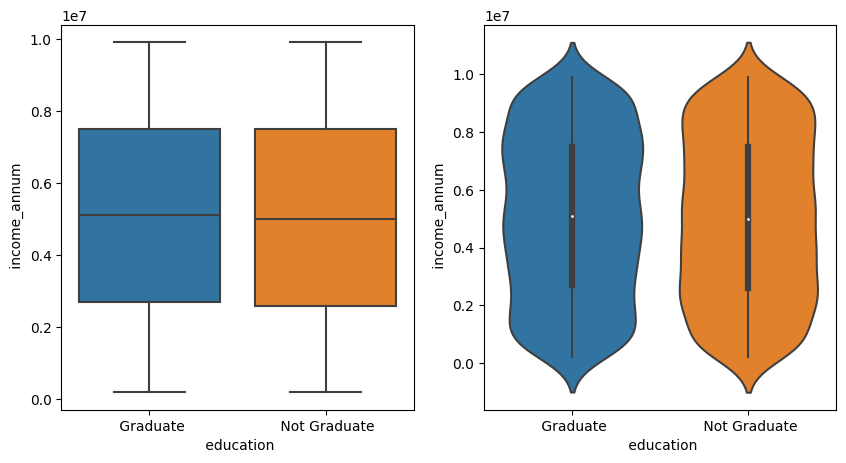

In [78]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

> The combination of boxplot and violinplot visualizations provides insights into the relationship between education levels of loan applicants and their annual incomes. The boxplot reveals that both graduates and non-graduates have similar median incomes, indicating that having a degree doesn't necessarily lead to a significant income advantage. 

> Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income `2000000 and 8000000` , whereas there is a uneven distribution among the graduates with more applicants having income between `6000000` and `8000000` Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.**

### Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

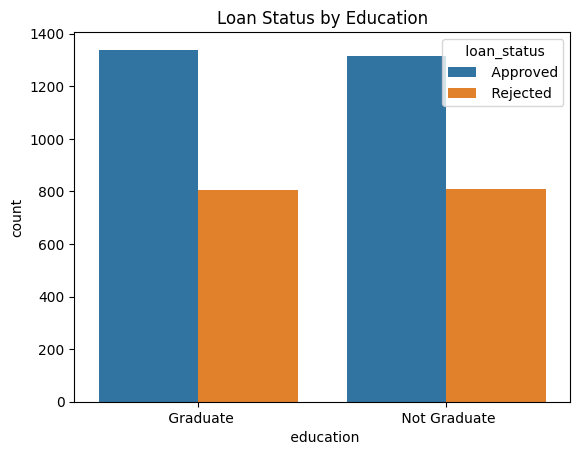

In [79]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

> The graph indicates that there's only a small difference between the number of loans approved and rejected for both graduate and non-graduate applicants. This difference is so small that it doesn't seem to be significant.

### Loan_Amount vs Terms

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

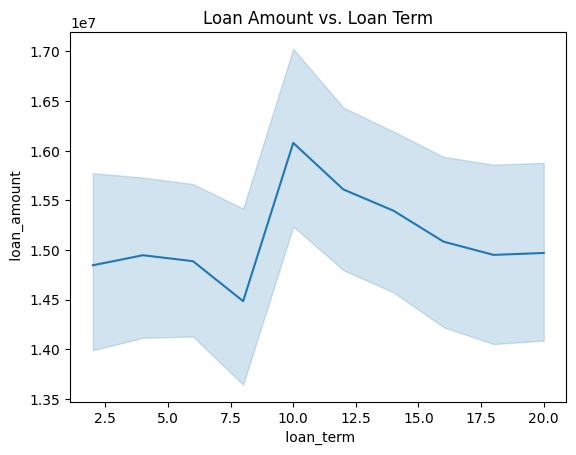

In [80]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

In [81]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved


> This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of `2.5 - 7.5 `years the loan amount is between `1400000 - 15500000`.

>However the loan amount is significantly higher for the loan tenure of `10 years`. There is a huge difference

### Loan Amount vs Loan Status

<AxesSubplot: xlabel=' loan_status', ylabel=' loan_amount'>

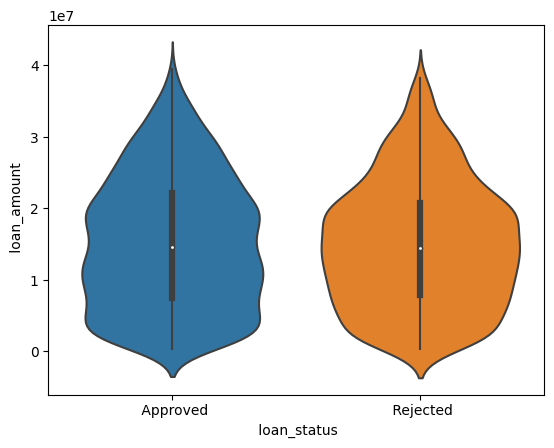

In [82]:
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)

### Loan amount & tenure Vs Loan Status

<AxesSubplot: xlabel=' loan_term', ylabel=' loan_amount'>

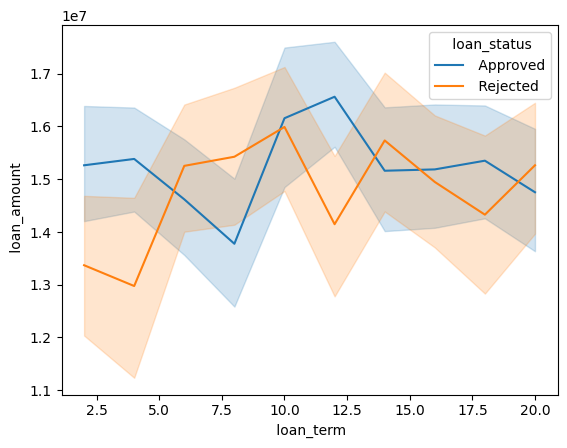

In [83]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

> The graph shows how loan amount, the time to repay, and loan approval are connected. It's clear that loans that are accepted often have higher amounts and shorter repayment times. On the other hand, loans that are rejected are usually for lower amounts and longer repayment periods. This could be because the bank prefers to approve loans that are easier to pay back quickly and that bring in more profit. They might not want to deal with very small loans due to the costs involved. However, other things like how reliable the person borrowing is with money also matter in these decisions. The graph gives us a glimpse into how banks think when they decide to approve or reject loans.

### CIBIL Score Distribution

>  cibil score ranges and their meaning.



\begin{array}{|c|c|} \hline
CIBIL & Meaning \\ \hline
300-549 & Poor  \\
550-649 & Fair  \\
650-749 & Good  \\
750-799 & Very Good  \\
800-900 & Excellent \\ \hline
\end{array}

<AxesSubplot: xlabel=' cibil_score', ylabel='Count'>

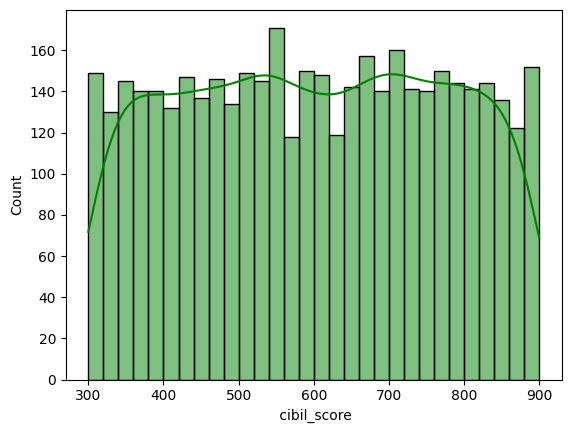

In [84]:
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='green')

> Looking at the table, most customers have low CIBIL scores (below 649), which could make it hard for them to get loans approved. But there's a good number of customers with high scores (above 649), which is positive for the bank. The bank can give these high-score customers special treatment like good deals and offers to get them interested in taking loans from the bank.
Based on this, we can guess that people with high CIBIL scores are more likely to get their loans approved. This is because higher scores usually mean they are better with money.
Overall, the bank can use this information to make decisions that help both the bank and its customers.

### CIBIL Score Vs Loan Status

<AxesSubplot: xlabel=' loan_status', ylabel=' cibil_score'>

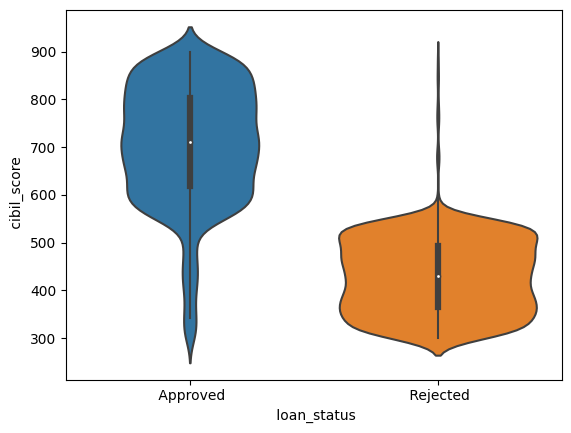

In [85]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

> The graph with the shapes (violinplot) clearly shows that people who got their loans approved tend to have higher CIBIL scores, mostly above 600. But for those whose loans weren't approved, the scores are more spread out and usually lower than 550. This means having a higher CIBIL score, especially over 600, really boosts the chances of getting a loan approved. It's clear that a good CIBIL score is important for loan approval.

### Asset Distribution

In [86]:
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# plt.subplot(1, 2, 1)
# sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
# plt.title("Movable_assets ")

# plt.subplot(1, 2, 2)
# plt.grid()
# sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
# plt.title("Immovable_assets ")

> Assets are really important when asking for a loan because they assure the bank you can pay back. The types are split into movable (like bank accounts and luxury things) and immovable (like homes and businesses). The graphs show how many people have these kinds of assets.
For movable assets, most people have less than 30 million, and not many have a lot more. For immovable assets, most have less than 15 million, and the number of people decreases as the value goes over 20 million.
In short, these graphs tell us that most people have lower-valued assets, and the number of people with more valuable assets decreases. It helps us understand how assets affect loan decisions.

### Assets Vs Loan Status

In [87]:
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
# sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

> Assets offer a safety net for the bank when giving out loans. These graphs display how movable and immovable assets relate to loan approval. Both graphs indicate that as assets increase, the likelihood of loan approval goes up, and the chances of rejection decrease. Additionally, the graphs highlight that there are more movable assets than immovable ones.

### Loan Amount Vs Income

<AxesSubplot: xlabel=' income_annum', ylabel=' loan_amount'>

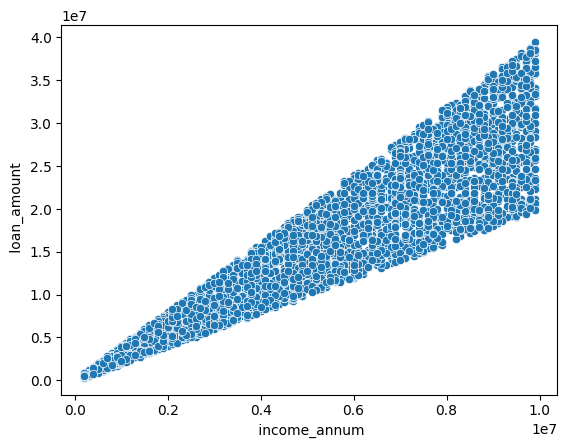

In [88]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

> The loan amount and the applicant's annual income share a straightforward connection. When the income is higher, the loan amount tends to be higher as well. This is because the applicant's income plays a major role in determining the appropriate loan amount they can afford to repay.

### Assets Vs Loan Amount

In [90]:
# fig, ax = plt.subplots(1,2,figsize=(10, 5))
# sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
# sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

> There is a positive relationship between the loan amount and both movable and immovable assets. When a person has more assets, whether movable (like money) or immovable (like property), the bank tends to offer a higher loan amount. In other words, having more assets increases the likelihood of getting a larger loan from the bank.

### Correlation Matrix

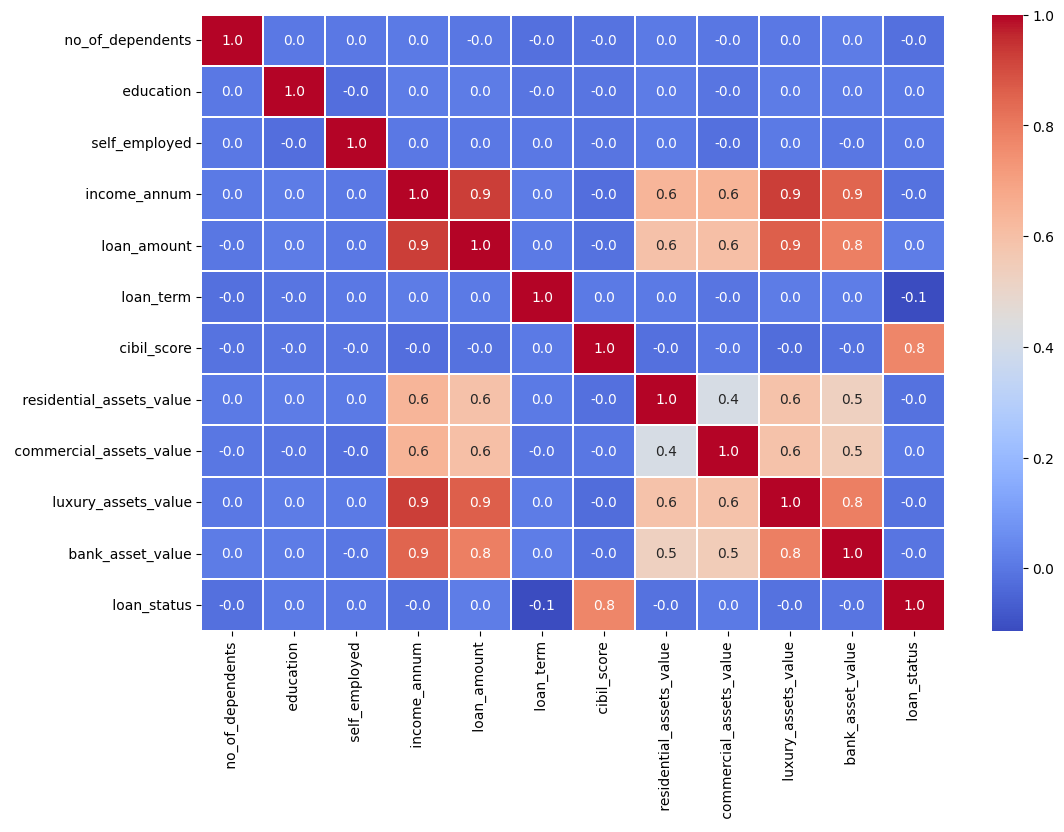

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [ ]:
df.corr()[' loan_status']

 no_of_dependents           -0.018114
 education                   0.004918
 self_employed               0.000345
 income_annum               -0.015189
 loan_amount                 0.016150
 loan_term                  -0.113036
 cibil_score                 0.770518
 residential_assets_value   -0.014367
 commercial_assets_value     0.008246
 luxury_assets_value        -0.015465
 bank_asset_value           -0.006778
 loan_status                 1.000000
Name:  loan_status, dtype: float64

The heatmap of correlation values shows several strong connections:

1. **Movable Assets and Immovable Assets**
2. **Income and Movable Assets**
3. **Income and Immovable Assets**
4. **Movable Assets and Loan Amount**
5. **Immovable Assets and Loan Amount**
6. **Loan Status and Cibil Score**
7. **Loan Amount and Income**

It makes sense that movable and immovable assets are related since they're both types of assets. Similarly, income is linked to both movable and immovable assets, as those with higher income tend to have more assets.

Now, let's look at how assets relate to the loan amount, as well as how income connects to the loan amount. We've already discussed the connection between loan status and CIBIL score in the previous part.

<a id="5"></a><br>
# 5. Data Preprocessing

### Label Encoding the categorical variables

In [91]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [92]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


> Now all features are numerical

### Histograms for each feature

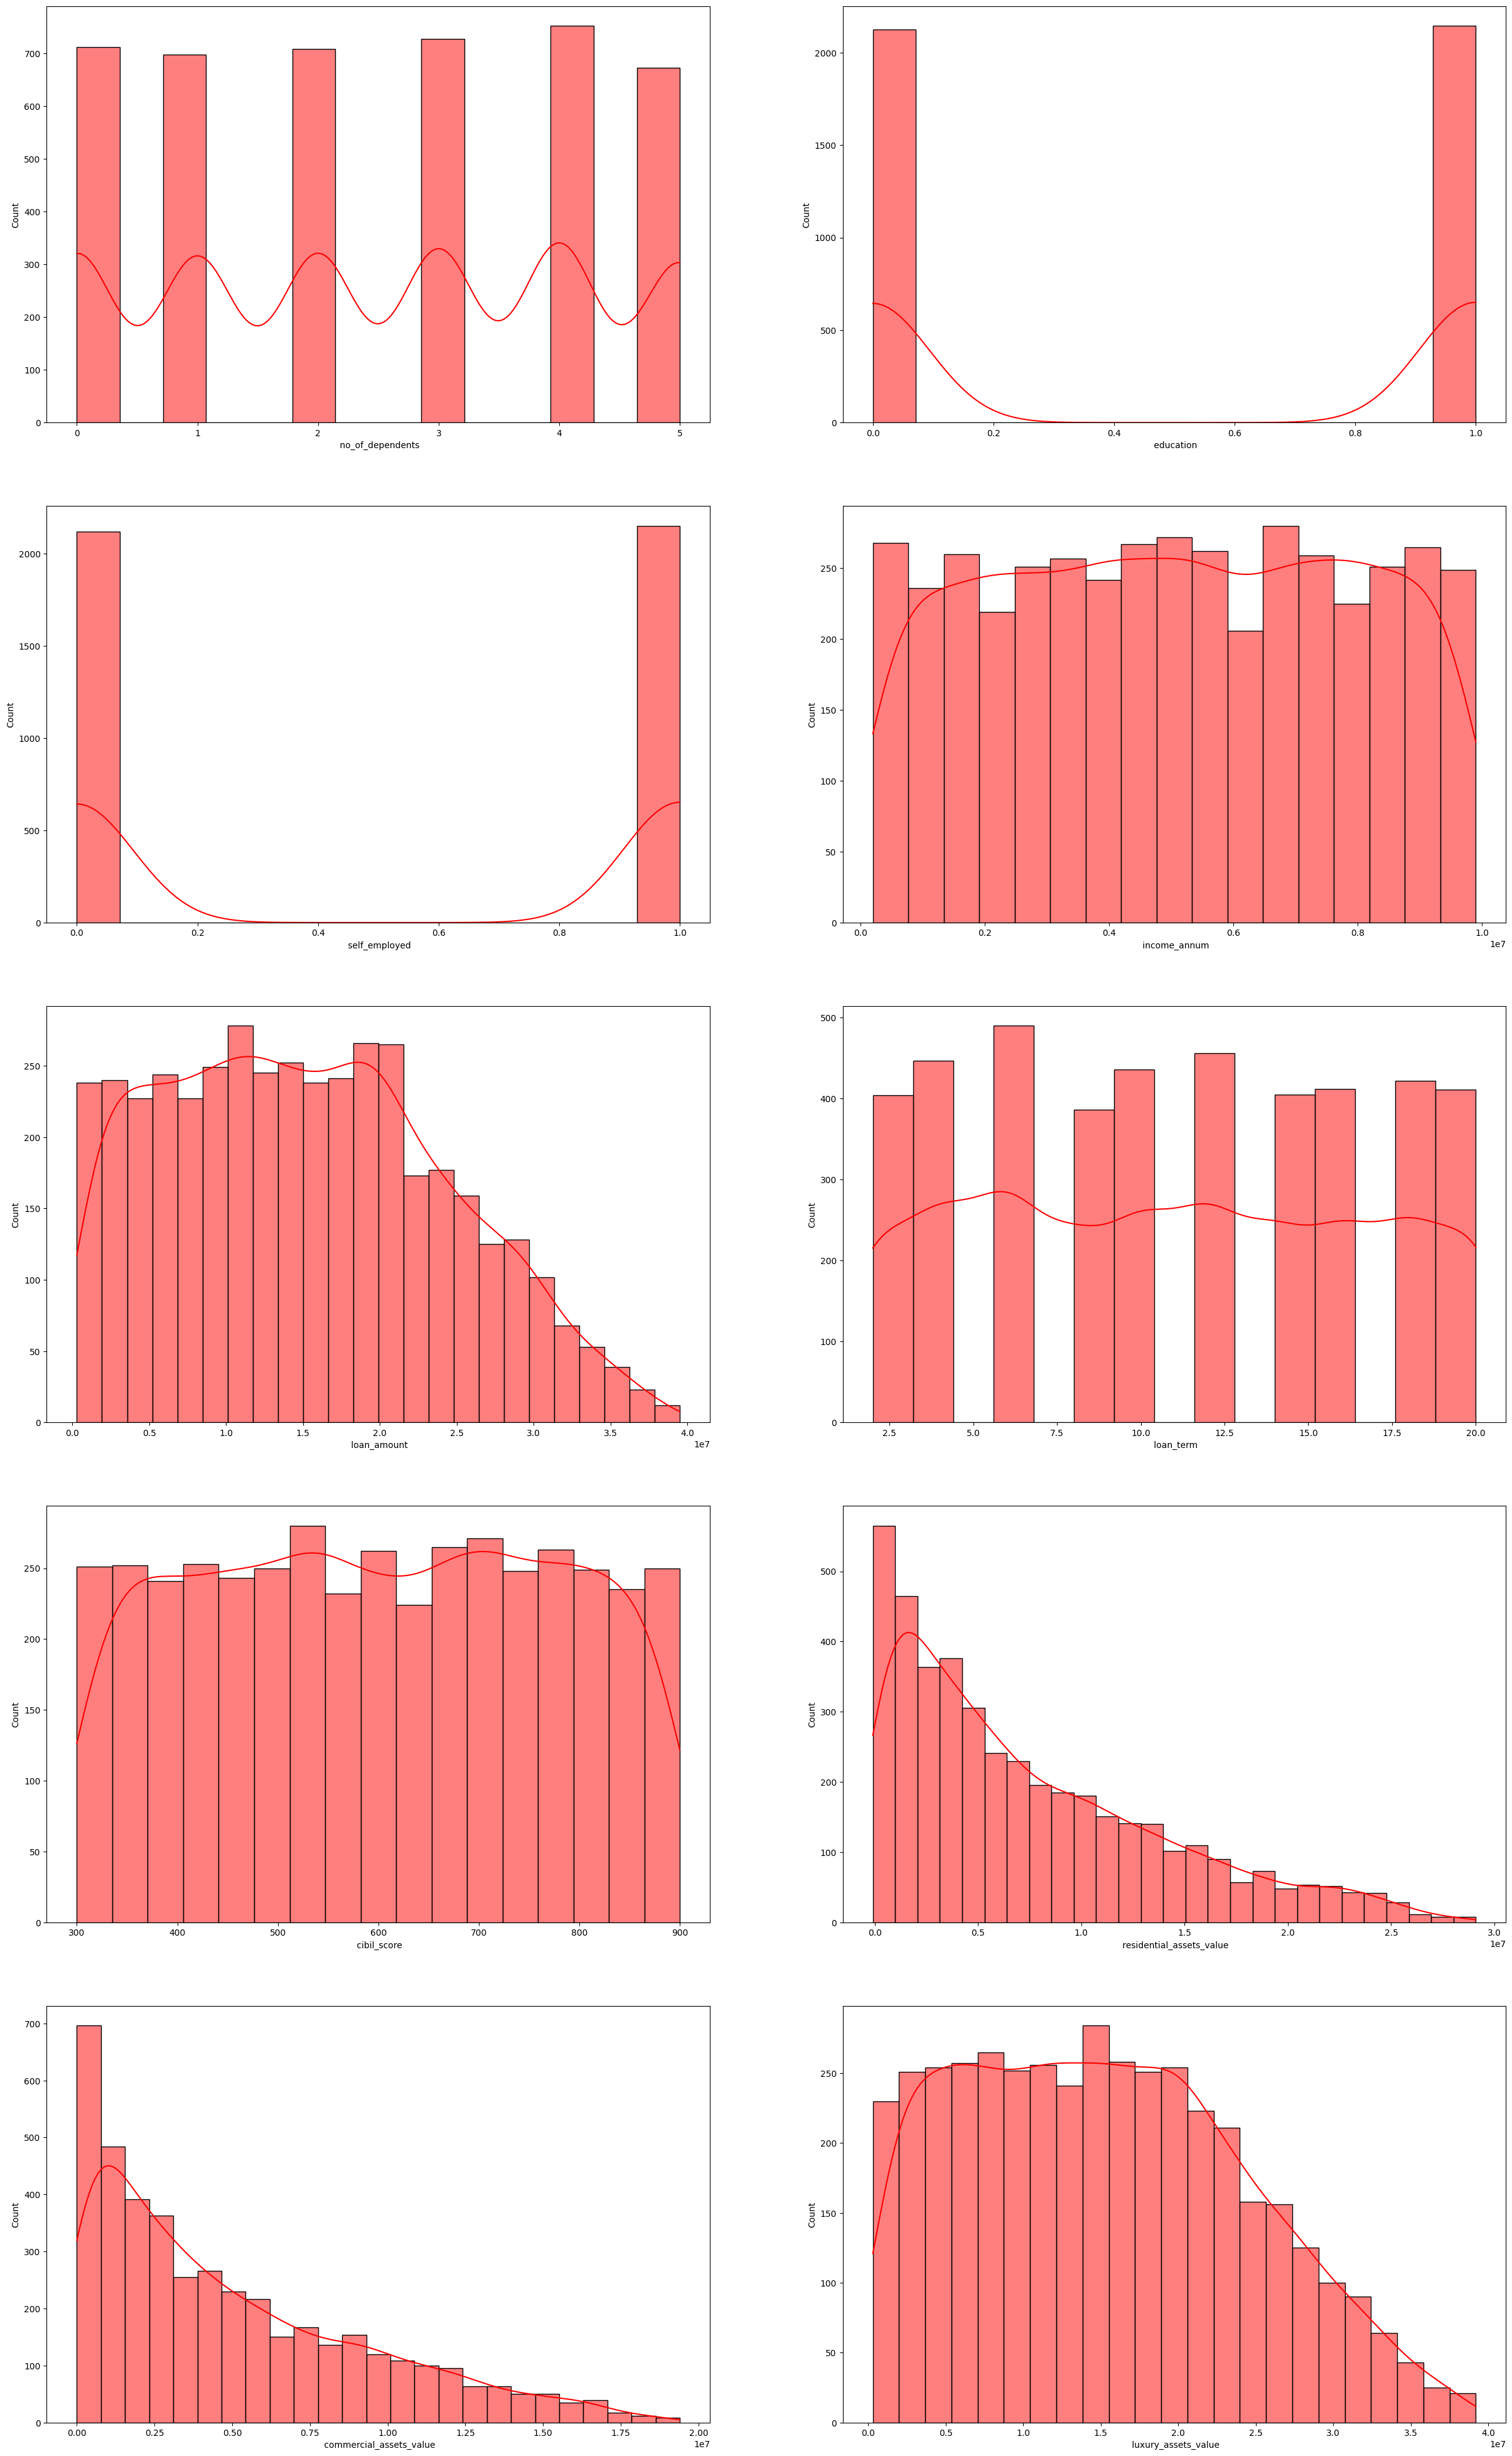

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(30,50)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col],kde=True, color='red', ax = ax)

### Boxplot for each feature

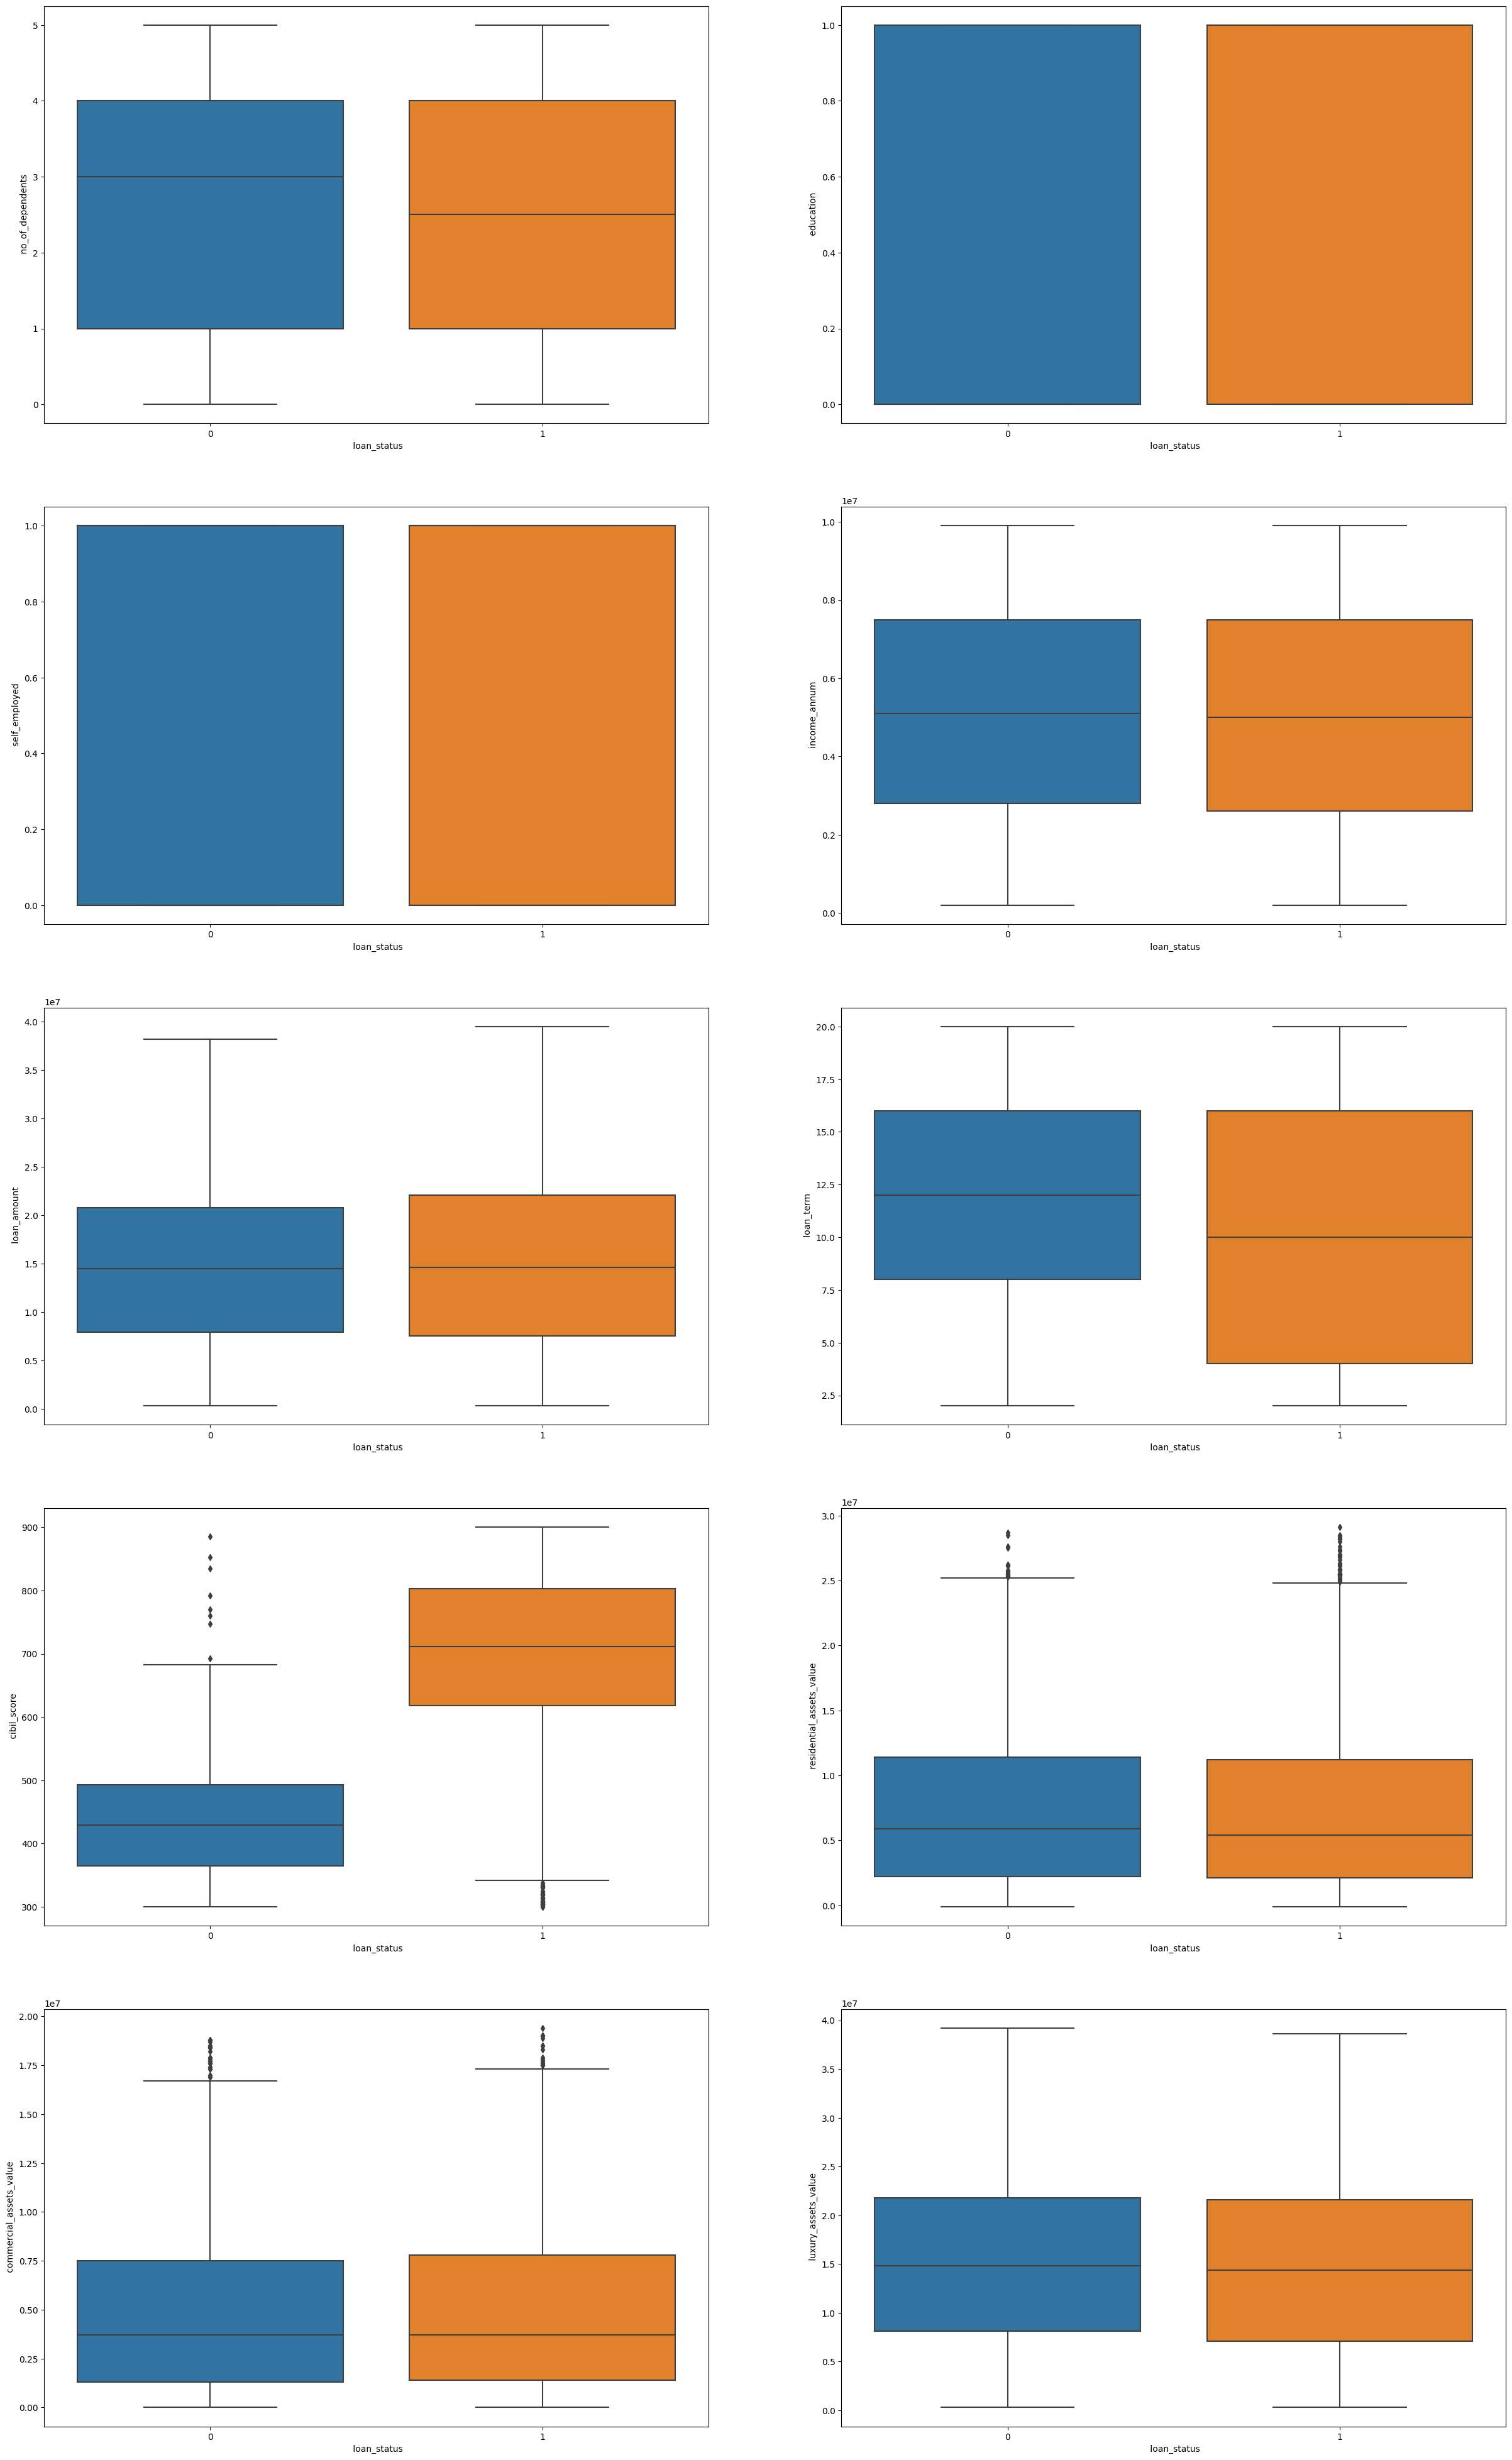

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(30,50)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [111]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [113]:
X = df.drop(' loan_status', axis = 1)
y = df[' loan_status']

In [117]:
y.value_counts()

1    2656
0    1613
Name:  loan_status, dtype: int64

> It is clearly unbalanced data, so we need to oversample the minority class

### Oversampling the minority class

In [118]:
from imblearn.over_sampling import RandomOverSampler

rs = RandomOverSampler()

X, y = rs.fit_resample(X,y)

In [119]:
y.value_counts()

1    2656
0    2656
Name:  loan_status, dtype: int64

In [93]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<a id="6"></a><br>
# 6. ML Modelling with Hyperparameter Tuning

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


### Train Test Split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling 

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Random Forest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_rf.predict(X_test))

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Random Forest): {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9840075258701787


## 2. Support Vector Classification (SVC)

In [137]:
from sklearn.svm import SVC

# Define the model
svm_model = SVC()

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_svm.best_params_
print("Best Hyperparameters (SVM):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_svm.predict(X_test))

print("SVM Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (SVM): {'C': 10, 'kernel': 'rbf'}
SVM Classifier:
Training Accuracy: 0.9767004000941398
Testing Accuracy: 0.9633113828786454


## 3. Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

# Define the model
nb_model = GaussianNB()

# No hyperparameters to tune for Gaussian Naive Bayes

# Fit the model
nb_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

print("Naive Bayes Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Naive Bayes Classifier:
Training Accuracy: 0.9505766062602965
Testing Accuracy: 0.9501411100658513


## 4. Gradient Boosting Classifier

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid, cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_gb.best_params_
print("Best Hyperparameters (GradientBoostingClassifier):", best_hyperparameters)

# Evaluate the model
train_accuracy = accuracy_score(y_train, grid_search_gb.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search_gb.predict(X_test))

print("Gradient Boosting Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Best Hyperparameters (GradientBoostingClassifier): {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
Gradient Boosting Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9840075258701787


## 5. Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Define the model
dt_model = DecisionTreeClassifier()

# Define hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_dc = GridSearchCV(dt_model, param_grid, cv=5)
grid_search_dc.fit(X_train, y_train)

# Print the best hyperparameters
best_hyperparameters = grid_search_dc.best_params_
print("Best Hyperparameters (Decision Tree):", best_hyperparameters)

# Get the best model
best_dt_model = grid_search_dc.best_estimator_

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Best Hyperparameters (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9774223894637818


<a id="8"></a><br>
# 8. Model Evalution (Confusion Matrix and Classification Report)

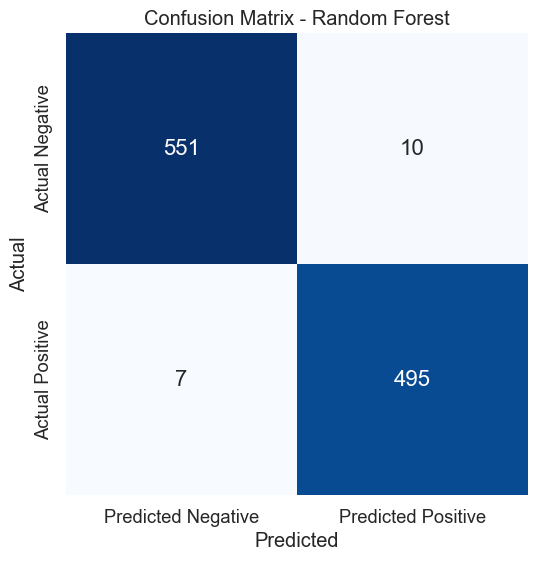

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       561
           1       0.98      0.99      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



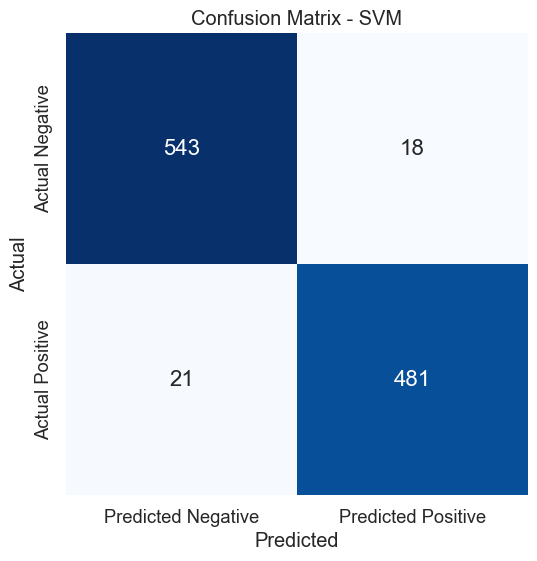

Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       561
           1       0.96      0.96      0.96       502

    accuracy                           0.96      1063
   macro avg       0.96      0.96      0.96      1063
weighted avg       0.96      0.96      0.96      1063



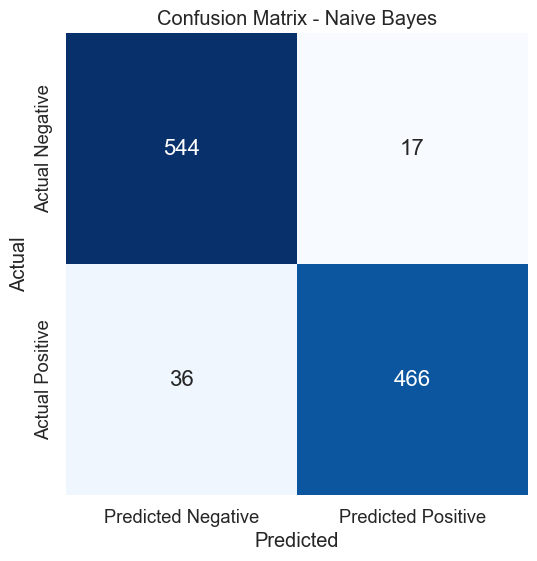

Classification Report - Naive Bayes:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       561
           1       0.96      0.93      0.95       502

    accuracy                           0.95      1063
   macro avg       0.95      0.95      0.95      1063
weighted avg       0.95      0.95      0.95      1063



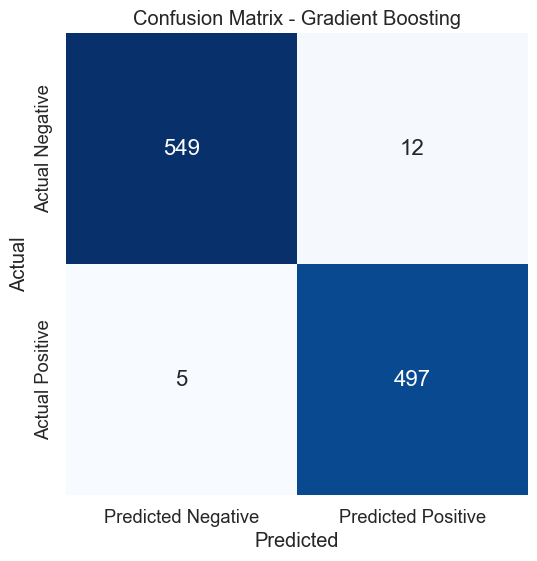

Classification Report - Gradient Boosting:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       561
           1       0.98      0.99      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



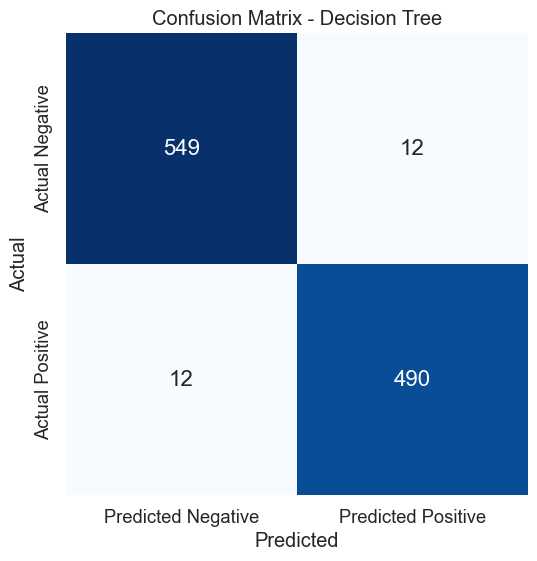

Classification Report - Decision Tree:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       561
           1       0.98      0.98      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of models
models = [
    ("Random Forest", grid_search_rf),
    ("SVM", grid_search_svm),
    ("Naive Bayes", nb_model),
    ("Gradient Boosting", grid_search_gb),
    ("Decision Tree", grid_search_dc),
]

# Loop through each model
for model_name, model in models:
    # Get model predictions
    predictions = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Create a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 16}, square=True,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    # Display classification report
    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_test, predictions))


### Summary of Model Performance for Loan Approval Prediction

> When looking at different ways to predict if loans will be approved or not, we found that the Random Forest and Gradient Boosting performedworked really well. It was accurate and could predict outcomes quite accurately. Decision tree model also did a good job.

> However, Support Vector Machine (SVM) and Naive Bayes didn't work well like the above models. They didn't predict as accurately as the Decision Tree and Random Forest models.


### Saving the Random Forest model

In [150]:
import pickle

# Save the grid_search_rf model to a file using pickle
model_filename = 'grid_search_rf_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(grid_search_rf, model_file)


<a id="9"></a><br>
